In [2]:
from datetime import datetime
start = datetime.now()
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from collections import defaultdict, Counter
from sklearn.feature_extraction import DictVectorizer

### Global Variables

In [4]:
BRANDS_LIST = list()
N_BRANDS = int()
N_FOLLOWERS = int()
DV = DictVectorizer(dtype=int)

### Loading Data to Memory

In [5]:
def load_data(in_file, brands_to_load = None, max_limit = 1404, verbose = False):
    """Loads data from the given data file.
    If the brands to be loaded is less than the maximum rows in the datafile, randomize the loading.
    Args:
      brands_to_load .... Number of brands to be loaded.
      in_file       .... A string representing the location and datafile name to be loaded.
    Returns:
      None. The data is loaded into the global variables."""

    if brands_to_load is None:
        brands_to_load = max_limit 
    
    #Randomize Loading
    if brands_to_load != max_limit:
        choices = sorted(random.sample(range(max_limit), brands_to_load))
        max_row_id = max(choices)
    else:
        choices = range(max_limit)
        max_row_id = max_limit-1
        
    brand_no = 0
    cur_idx = 0
    brand_followers = list()
    
    with open(in_file) as data_file:
        for row in data_file:
            if brand_no > max_row_id:
                break
            if brand_no != choices[cur_idx]:
                brand_no += 1
                continue
            else:
                followers = row.split()
                brand = followers.pop(0)
                followers_count = len(followers)
            
                #Ignoring brands with less than 1000 followers
                if followers_count > 1000:  
                    
                    followers_dict = Counter(followers)
                    brand_followers.append(followers_dict)
                    BRANDS_LIST.append(brand)
                    
                    if verbose:
                        print('Loaded',brand,'-',followers_count,'followers.')
                else:
                    if verbose:
                        print('Skipped',brand,'-',followers_count,'followers.')
            
                brand_no += 1
                cur_idx += 1
    
    data = DV.fit_transform(brand_followers)
    
    return data

In [6]:
brands_to_load = 100
max_rows = 1404
verbose = True

BF_DATA = load_data('data/brand_followers_final.tsv', brands_to_load, max_rows, verbose)
N_BRANDS,N_FOLLOWERS = BF_DATA.get_shape()
print('\nNo. of Brands', N_BRANDS)
print('No. of Unique Followers', N_FOLLOWERS)

Loaded 20thcenturyfox - 500001 followers.
Loaded acer - 12345 followers.
Loaded activia - 1970 followers.
Loaded aquaphorus - 17640 followers.
Loaded arcona_la - 1282 followers.
Loaded athenos - 8253 followers.
Loaded bayescleaners - 8585 followers.
Loaded bhcosmetics - 50963 followers.
Loaded birdseye - 12701 followers.
Loaded blue_bunny - 31086 followers.
Loaded bobatl - 500001 followers.
Loaded bodyimage - 3262 followers.
Loaded buitoniusa - 7430 followers.
Loaded bummis - 9345 followers.
Loaded butterfinger - 30784 followers.
Loaded bwaynails - 30929 followers.
Loaded caneandaustin - 1121 followers.
Loaded chefmartinyan - 1856 followers.
Loaded cosmermaid - 6270 followers.
Loaded cuddleclones - 1534 followers.
Loaded davinesofficial - 3997 followers.
Loaded dial - 7460 followers.
Loaded dreamdrystyle - 4115 followers.
Loaded drysolecuador - 1638 followers.
Loaded eckounltd - 18914 followers.
Loaded eco_me - 1609 followers.
Loaded embryolisseusa - 3304 followers.
Loaded essentiaphwa

### No. of Brands Followed Vs No. of Followers

In [12]:
beg = datetime.now()
sum(BF_DATA)
end = datetime.now()
print('Time taken', end-beg)

Time taken 0:00:02.763833


Time taken 0:00:03.183110

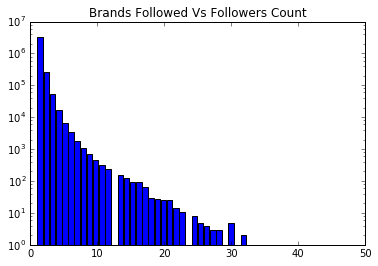

In [16]:
hist, bins = np.histogram(sum(BF_DATA).toarray(),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Brands Followed Vs Followers Count')

In [6]:
x = sum(BF_DATA).toarray()
followers = np.where(x >= 5)[1]
print('Unique Followers Pool',len(followers)) 
print('\nSample Values:')
print('\tFollower Idx:',followers[0], 'Follower ID:', DV.feature_names_[followers[0]])
print('\tBrands Followed:', len(BF_DATA.getcol(followers[0]).nonzero()[0]))

Unique Followers Pool 147273

Sample Values:
	Follower Idx: 8 Follower ID: 1000002090
	Brands Followed: 7


In [7]:
pct = 0.005
follower_ind = random.sample(list(followers), int(len(followers) * pct))
print('Sampled',len(follower_ind),'followers')
print('Indices:',follower_ind)

Sampled 736 followers
Indices: [122135, 7541638, 4162971, 4455724, 4037900, 2619512, 5575530, 2412347, 3823513, 2991079, 7505946, 3456850, 4863084, 945506, 4589273, 608781, 1617904, 3963708, 7438623, 7391759, 6423030, 1167362, 326457, 4154920, 505041, 3697819, 3510814, 1870199, 1870646, 1623842, 6482962, 183730, 607345, 7576177, 1000359, 2759826, 6790695, 7148131, 2697733, 3595210, 625880, 1644062, 2123767, 4402982, 2773610, 1756431, 830359, 5069041, 427124, 4055957, 2540593, 1741430, 1789752, 2898680, 7133688, 2815593, 163331, 3622491, 1697681, 3698247, 3456610, 582260, 6818833, 6906597, 7062060, 4091701, 2531413, 1535829, 5851641, 1672627, 4155762, 3562149, 1563437, 4678491, 2761654, 133229, 6162087, 2599251, 3203566, 5104059, 3683507, 7179027, 3091782, 1394201, 3770578, 5984212, 1043369, 616705, 4930991, 6885797, 1078348, 4778289, 2395435, 3924562, 2738323, 3447414, 5904057, 6989171, 5429648, 6668732, 2331113, 1591003, 6224831, 2492112, 3357288, 1042348, 3026294, 4345336, 326884, 49

In [8]:
brands_to_remove = {}
for follower_idx in follower_ind:
    brand_idx = np.random.choice(BF_DATA.getcol(follower_idx).nonzero()[0])
    brands_to_remove[follower_idx] = brand_idx
    BF_DATA[brand_idx, follower_idx] = 0
    print('Removed edge', (brand_idx,follower_idx))

Removed edge (48, 122135)
Removed edge (98, 7541638)
Removed edge (147, 4162971)
Removed edge (68, 4455724)
Removed edge (161, 4037900)
Removed edge (107, 2619512)
Removed edge (93, 5575530)
Removed edge (147, 2412347)
Removed edge (48, 3823513)
Removed edge (53, 2991079)
Removed edge (53, 7505946)
Removed edge (182, 3456850)
Removed edge (125, 4863084)
Removed edge (32, 945506)
Removed edge (147, 4589273)
Removed edge (147, 608781)
Removed edge (170, 1617904)
Removed edge (184, 3963708)
Removed edge (56, 7438623)
Removed edge (186, 7391759)
Removed edge (67, 6423030)
Removed edge (21, 1167362)
Removed edge (49, 326457)
Removed edge (82, 4154920)
Removed edge (53, 505041)
Removed edge (182, 3697819)
Removed edge (98, 3510814)
Removed edge (32, 1870199)
Removed edge (48, 1870646)
Removed edge (38, 1623842)
Removed edge (83, 6482962)
Removed edge (147, 183730)
Removed edge (52, 607345)
Removed edge (35, 7576177)
Removed edge (52, 1000359)
Removed edge (49, 2759826)
Removed edge (37, 6790

In [9]:
def get_similarity_matrix(data='BF_DATA', similarity='Jaccard'):
    
    if similarity == 'Jaccard' and data=='BF_DATA':
        
        sim_mat = np.zeros((N_BRANDS,N_BRANDS))
        
        for brand_pair in combinations(range(N_BRANDS),2):
            
            b1 = BF_DATA.getrow(brand_pair[0])
            b2 = BF_DATA.getrow(brand_pair[1])
            
            common_connections = b1.multiply(b2).sum()
            total_connections = b1.sum() + b2.sum() - common_connections
            sim = common_connections/total_connections
            
            sim_mat[brand_pair[0] , brand_pair[1]] = sim_mat[brand_pair[1] , brand_pair[0]] = sim
            
    return sim_mat

In [10]:
SIM_MAT = get_similarity_matrix()

In [11]:
def predict_rank(scores, norm_factor, removed_brand):
    rank = 0
    for tup in sorted(scores.items(), key=lambda x: x[1]/norm_factor, reverse=True):
        rank += 1
        if tup[0] == removed_brand:
            return rank
    return None

In [12]:
def check_overlap(user_idx, brand_followed, brand_not_followed, brand_removed):
    if brand_removed == brand_not_followed:
        if SIM_MAT[brand_followed,brand_not_followed] == 0:
            print('[BR]No Overlap between',BRANDS_LIST[brand_followed], BRANDS_LIST[brand_not_followed])
            return True
        else:
            b1 = BF_DATA.getrow(brand_followed)
            b2 = BF_DATA.getrow(brand_not_followed)
            if b1.multiply(b2).sum() == 0:
                print('[AR]No Overlap between',BRANDS_LIST[brand_followed], BRANDS_LIST[brand_not_followed])
                return True
    return False

In [13]:
prediction_rank = dict()
for follower_idx in follower_ind:
    brands_followed = BF_DATA.getcol(follower_idx).nonzero()[0]
    brands_not_followed = np.delete(np.arange(N_BRANDS),brands_followed)
    scores = {}
    no_overlaps = {}
    for brand_not_followed in brands_not_followed:
        scores[brand_not_followed] = 0
        for brand_followed in brands_followed:
            scores[brand_not_followed] += SIM_MAT[brand_followed,brand_not_followed]
            #if check_overlap(follower_idx, brand_followed, brand_not_followed,brands_to_remove[follower_idx]):
                #print('Yikes!',brand_followed, brand_not_followed)
    prediction_rank[follower_idx] = predict_rank(scores, len(brands_followed), brands_to_remove[follower_idx])

In [14]:
list(prediction_rank.items())

[(1167362, 10),
 (124932, 3),
 (5879813, 2),
 (6119426, 13),
 (499727, 1),
 (4096016, 1),
 (1353745, 7),
 (2797587, 3),
 (6701077, 4),
 (7505946, 1),
 (4435995, 5),
 (7198750, 1),
 (3256351, 1),
 (6367271, 17),
 (2046001, 2),
 (1347635, 10),
 (2643537, 8),
 (1295028, 1),
 (2879550, 15),
 (6387776, 3),
 (3338305, 1),
 (6064199, 2),
 (2406474, 17),
 (2916433, 1),
 (7213140, 4),
 (2531413, 1),
 (5151417, 2),
 (391256, 1),
 (2324573, 35),
 (3192926, 1),
 (929808, 1),
 (3183291, 2),
 (133229, 1),
 (6115442, 9),
 (7282805, 1),
 (520311, 1),
 (2619512, 2),
 (1910911, 1),
 (3840699, 55),
 (1724549, 2),
 (5189767, 9),
 (5458057, 2),
 (2932874, 29),
 (7286466, 5),
 (653454, 2),
 (2738323, 1),
 (2001945, 65),
 (4880541, 1),
 (1429189, 6),
 (5988512, 28),
 (3825826, 1),
 (768027, 2),
 (3782824, 1),
 (6455466, 12),
 (2676907, 2),
 (3051078, 1),
 (6381742, 1),
 (100527, 1),
 (3864753, 2),
 (2724019, 4),
 (3352756, 1),
 (2607285, 4),
 (5157047, 2),
 (4001976, 2),
 (6758589, 11),
 (1755327, 1),
 (1310

In [15]:
from functools import reduce
rank_sum = reduce(lambda x,y: x+y, prediction_rank.values())
print('Mean Rank', rank_sum/len(prediction_rank))

Mean Rank 8.891304347826088


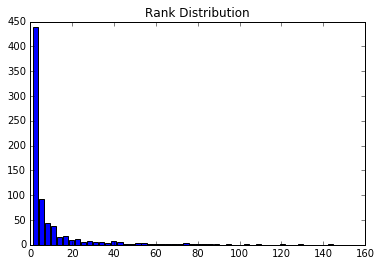

In [16]:
hist, bins = np.histogram(list(prediction_rank.values()),bins=50)    
width = 0.9 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
#plt.yscale("log")
plt.bar(center, hist, align='center', width=width)
plt.title('Rank Distribution')

In [17]:
mean_rank = {}
brands_followed_count = {}
for k in prediction_rank:
    count = len(BF_DATA.getcol(k).nonzero()[0])
    if count in mean_rank.keys():
        mean_rank[count] += prediction_rank[k]
        brands_followed_count[count] += 1
    else:
        mean_rank[count] = prediction_rank[k]
        brands_followed_count[count] = 1

In [18]:
brands_followed_count

{4: 319,
 5: 167,
 6: 89,
 7: 55,
 8: 37,
 9: 11,
 10: 16,
 11: 12,
 12: 4,
 13: 3,
 14: 4,
 15: 2,
 16: 3,
 17: 2,
 18: 1,
 19: 1,
 20: 1,
 21: 2,
 22: 1,
 23: 1,
 26: 1,
 27: 1,
 29: 1,
 30: 1,
 44: 1}

In [19]:
for k in mean_rank:
    mean_rank[k] //= brands_followed_count[k]
mean_rank

{4: 8,
 5: 6,
 6: 8,
 7: 12,
 8: 6,
 9: 11,
 10: 4,
 11: 19,
 12: 3,
 13: 2,
 14: 12,
 15: 8,
 16: 27,
 17: 21,
 18: 5,
 19: 22,
 20: 54,
 21: 19,
 22: 30,
 23: 23,
 26: 9,
 27: 12,
 29: 34,
 30: 8,
 44: 26}

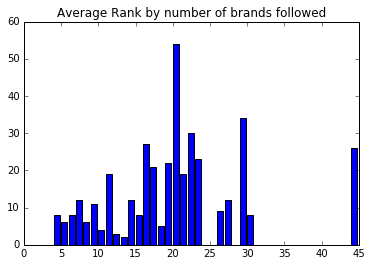

In [20]:
data_points = mean_rank.items()
x = [p[0] for p in data_points]
y = [p[1] for p in data_points]
plt.bar(x,y)
plt.title('Average Rank by number of brands followed')

In [21]:
good_predictions = []
bad_predictions = []
max_rank = max([p[1] for p in data_points])
for k in prediction_rank:
    if prediction_rank[k] >= max_rank*0.5:
        bad_predictions.append(brands_to_remove[k])
    else:
        good_predictions.append(brands_to_remove[k])
final_list = list(set(bad_predictions) - set(good_predictions))
final_list.sort()
for b in final_list:
    print(BRANDS_LIST[b])

3mnews
acneorg
aquafina
babobotanicals
belkin
bissellclean
bwaynails
dameelizabeth
fishernutsbrand
govoskos
huggies
jewelosco
kelloggcompany
lashem
mineralfusion
montagnejeuness
nakedpizza
onecoconut
ouidad
preschoice
proactiv
realcapncrunch
reallunchables
samsung
tedgibson
thermador


In [22]:
stop = datetime.now()
print('Time taken',stop-start)

Time taken 0:05:01.799437


Time taken 0:02:27.579176